In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from scipy.sparse import spdiags

ModuleNotFoundError: No module named 'scipy'

In [2]:
alpha1 = 1
alpha2 = 2
L = 30.0
xt = 15
tf = 100.0

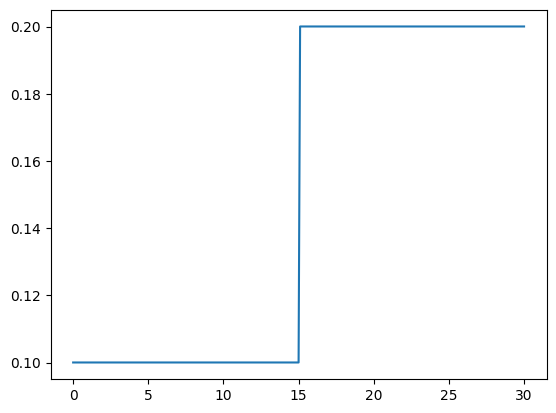

In [3]:
nx = 301
nt = 10000

x = np.linspace(0,L,nx) # Need L to evenly divide into nx
t = np.linspace(0,tf,nt) # Need tf to evenly divide into nt

dt = t[1]-t[0]
dx = x[1]-x[0]

lam = np.zeros(nx)
lam[x<=xt] = alpha1*dt/dx
lam[x>xt] = alpha2*dt/dx

plt.plot(x,lam)

In [4]:
u = np.nan*np.ones([nx,nt])
u[:,0] = np.exp(-(x**2) / 2)
u[:,1] = np.exp(-(x**2) / 2)

In [5]:
data = np.array([(lam**2)*np.ones(nx), 2*(1-lam**2)*np.ones(nx), (lam**2)*np.ones(nx)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nx, nx).toarray()

NameError: name 'spdiags' is not defined

In [6]:
#Reflective BC
M[0,0] = 2-lam[0]**2
M[-1,-1] = 2-lam[-1]**2

NameError: name 'M' is not defined

In [7]:
for k in np.arange(nt-2):
    u[:,k+2] = np.matmul(M,u[:,k+1]) - u[:,k]

NameError: name 'M' is not defined

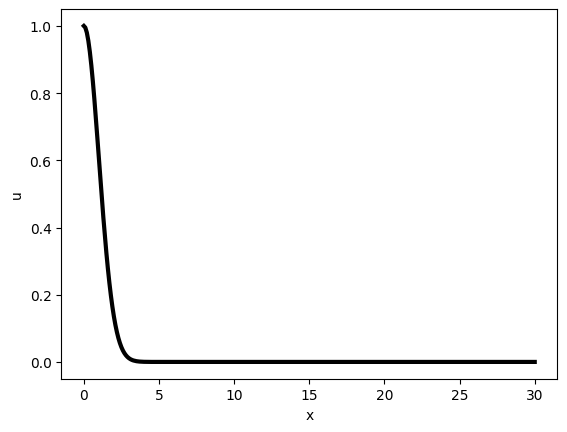

In [8]:
for k in range(1, 10, nt):
    plt.plot(x,u[:,k], 'k', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('u')
    #set(gca,fontsize=20)

In [9]:
#alpha = u + or - sqrt(gravity * Height or Mean Depth of Lower Layer)
# Have to modify above equation to fit two alpha values'
# Assume perturbation values can be neglected because H >> h'
# Assume two layers we're dealing with are water (bottom) and air (top)
# h' = A*e^(ik[x-(u+sqrt(gH))t]) What is A? i & k are time and place step, respectively
# Remember: default equation is partial 2nd time (t) derivative of h' + c^2 * partial 2nd space (x) derivative of h' = 0
g = 9.81 #m/(s^2) - average gravitational acceleration
H = 3700 #m - also the average depth of the ocean
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
# The following are based upon the assumption that the upper layer is air and the lower layer is water
c1 = u_Line_Stable + ma.sqrt(g*H)
c2 = u_Line_Reverse - ma.sqrt(g*H)
x_Scale = 1.0 #5000 #m - part of a 5km space scale
t_Scale = 1.0 #3600 #s - hourly time scale

In [10]:
x_Total = 568 #28385000 #m - "circumference" of the Earth at 45 degrees latitude (mid-latitudes)
t_Total = 336 #1209600 #s - amount of time for an individual air parcel to circumnavigate the globe in the mid-latitudes (roughly 2 weeks)

x_Array = np.linspace(0,x_Scale,x_Total) # Need x_Scale to evenly divide into x_Total
t_Array = np.linspace(0,t_Scale,t_Total) # Need t_Scale to evenly divide into t_Total

delta_t = t_Array[1]-t_Array[0] #time step
delta_x = x_Array[1]-x_Array[0] #space step

lam_Stable = np.zeros(x_Total) #Creating the stable c/alpha case
for i in np.arange(x_Total):
    lam_Stable[i] = c1*delta_t/delta_x #Establishing the stable c/alpha case

lam_Reverse = np.zeros(x_Total) #Creating the stable c/alpha case with opposite flow
for i in np.arange(x_Total):
    lam_Reverse[i] = c2*delta_t/delta_x #Establishing the above case

In [11]:
stable_u = np.nan*np.ones([x_Total,t_Total])
stable_u[:,0] = np.exp(-(x_Array**2) / 2)
stable_u[:,1] = np.exp(-(x_Array**2) / 2)

reverse_u = np.nan*np.ones([x_Total,t_Total])
reverse_u[:,0] = np.exp(-(x_Array**2) / 2)
reverse_u[:,1] = np.exp(-(x_Array**2) / 2)

In [12]:
# Westerlies in mid-latitudes
stable_Data = np.array([(lam_Stable**2)*np.ones(x_Total), 2*(1-lam_Stable**2)*np.ones(x_Total), (lam_Stable**2)*np.ones(x_Total)])
stable_Diags = np.array([-1, 0, 1])
stable_M = spdiags(stable_Data, stable_Diags, x_Total, x_Total).toarray()

# Now for the Other Option (aka westerlies are now easterlies)
reverse_Data = np.array([(lam_Reverse**2)*np.ones(x_Total), 2*(1-lam_Reverse**2)*np.ones(x_Total), (lam_Reverse**2)*np.ones(x_Total)])
reverse_Diags = np.array([-1, 0, 1])
reverse_M = spdiags(reverse_Data, reverse_Diags, x_Total, x_Total).toarray()

NameError: name 'spdiags' is not defined

In [13]:
#Reflective BC
stable_M[0,0] = 2-lam_Stable[0]**2
stable_M[-1,-1] = 2-lam_Stable[-1]**2

#Reflective BC
reverse_M[0,0] = 2-lam_Reverse[0]**2
reverse_M[-1,-1] = 2-lam_Reverse[-1]**2

NameError: name 'stable_M' is not defined

In [14]:
# First up, the normal case
for k in np.arange(t_Total-2):
    stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
    
# And now the reverse!
for k in np.arange(t_Total-2):
    reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]

#Still Generating RuntimeWarnings due to overflow and invalid values in matmul - investigate asap

NameError: name 'stable_M' is not defined

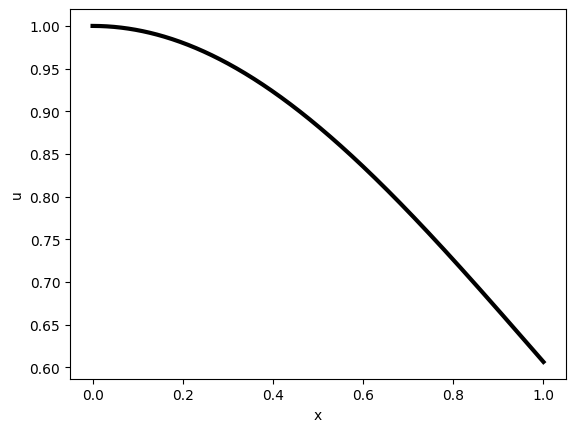

In [15]:
#Normal Case is First
for k in range(1, 4, t_Total):
    plt.plot(x_Array,stable_u[:,k],'k',linewidth=3)
    plt.xlabel('x');
    plt.ylabel('u');

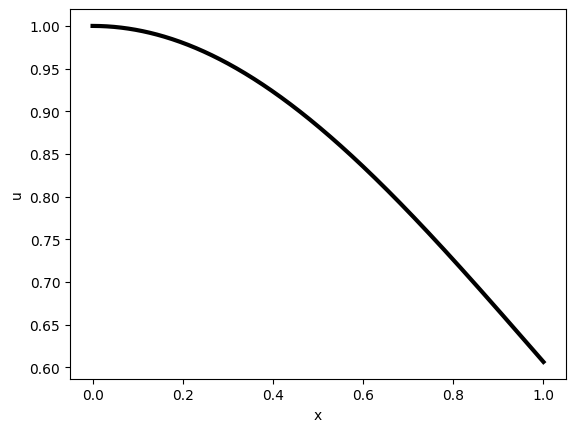

In [16]:
#Reverse Case
for k in range(1, 4, t_Total):
    plt.plot(x_Array,reverse_u[:,k],'k',linewidth=3)
    plt.xlabel('x');
    plt.ylabel('u');

#H is now a function of x, which means c = c(x) and alpha = alpha(x) for both forward and reverse cases
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
g = 9.81 #m/(s^2) - average gravitational acceleration
H = np.zeros(x_Total)
H = 5*np.sin(x_Array)
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
c3 = np.zeros(x_Total)
c4 = np.zeros(x_Total)
for i in np.arange(x_Total):
    c3[i] = u_Line_Stable + ma.sqrt(g*H[i])
    c4[i] = u_Line_Reverse - ma.sqrt(g*H[i])
H


Paper: Internal gravity waves in the atmosphere (Holton Ch. 7)

This paper covers linear perturbation theory, a subject within atmospheric oscillations. Linear perturbation theory helps scientists gain physical insight into the fundamental nature of atmospheric motions by being able to examine several types of pure waves. These waves are very integral in transporting energy and momentum within the atmosphere, so understanding the linear perturbation theory will assist those who know it with understanding how pure atmospheric waves will impact weather. Other scientists may use 3D linear stability analysis based on Floquet theory to analyze internal gravity waves.

Wave motions are oscillations in field variables, like pressure and velocity, that spread through time and space. Our models are concerned with linear sinusoidal wave motions, where the period is independent of the amplitude. 

Representations of perturbations are simple sinusoidal waves, which may seem like an oversimplification at first as disturbances in the atmosphere are very rarely purely sinusoidal. However, most functions of longitude can be accurately depicted in terms of a zonal average plus a Fourier series of sinusoidal components.

Atmospheric waves transport energy and mix the air. Atmospheric waves can be caused by gravitational or solar heating forces, among many other forces. Types of atmospheric waves include Rossby waves, buoyancy waves, inertial waves, and topographic waves. The simplest atmospheric waves are sinusoidal oscillations that satisfy linearized forms of several dynamical equations. The dynamical equations are linearized by dividing all field methods into the basic state and perturbation portions, discussed below. 

The perturbation method is a mathematical method used for qualitative analysis of atmospheric waves. Perturbation method can be used to analyze multiple types of atmospheric waves. In perturbation method, all field variables are divided into two parts:
Basic state portion: Variables independent of time and longitude. They are assumed to be an east-west flow.
Perturbation portion: The local oscillatory deviation of the field from the basic state, assumed to be small. 

Perturbation theory comes with several assumptions that hold true for all cases. The first is that the basic state variables must satisfy governing equations when perturbations are at a value of zero. Additionally, perturbations fields have to be so miniscule that all the terms involving products of the perturbations in the governing equations can be neglected entirely. 

So, if u (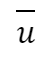) is a time and longitude averaged zonal velocity value, and u' is the local deviation from that average, the zonal velocity field would be written as u(x,t) = u(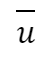)+u'(x,t). 

So, inertial acceleration can be written as:
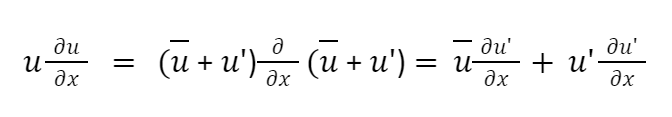

The assumptions of the perturbation theory will be met in the example above as long as
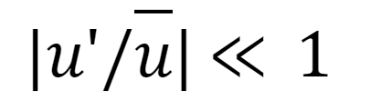

so that
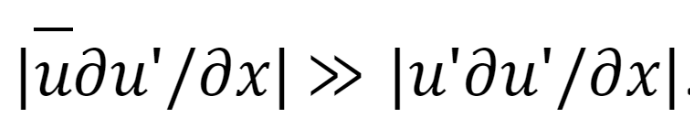

If the terms that are products of the perturbation variables are successfully neglected, the nonlinear governing equations will become linear differential equations in the perturbation variables. In this case, the basic state variables are specified coefficients. The linear differential equations can then be solved by standard mathematical practices to get the structure and character of the perturbations in terms of the given basic state. For equations with constant coefficients, the solutions will be sinusoidal or exponential in character. Characteristics such as propagation speed, vertical structure, and conditions for growth and decay of the given atmospheric waves are determined by the solutions of the perturbation equations.

Fourier series of sinusoidal components:
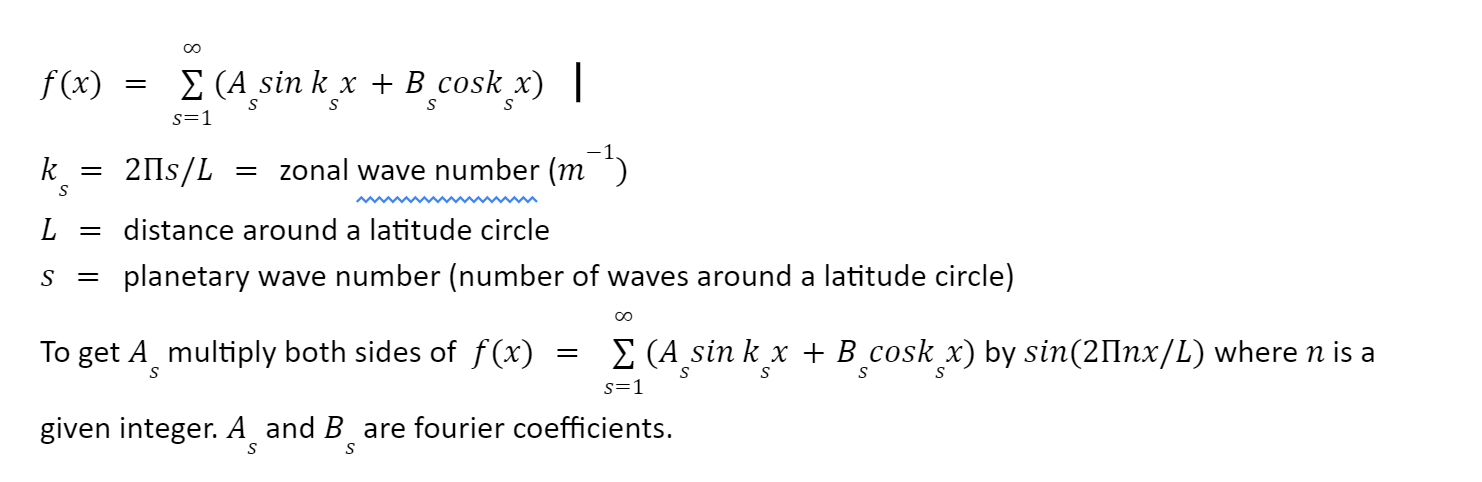

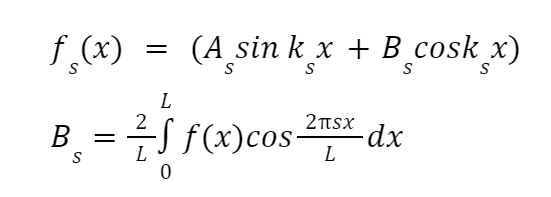
For the qualitative analysis that we are doing, usually it is sufficient to limit the analysis to one fourier component, assuming the behavior of the actual field will be similar to that of the chosen component.

According to the Euler formula, this is the expression for a fourier component using complex exponential notation:
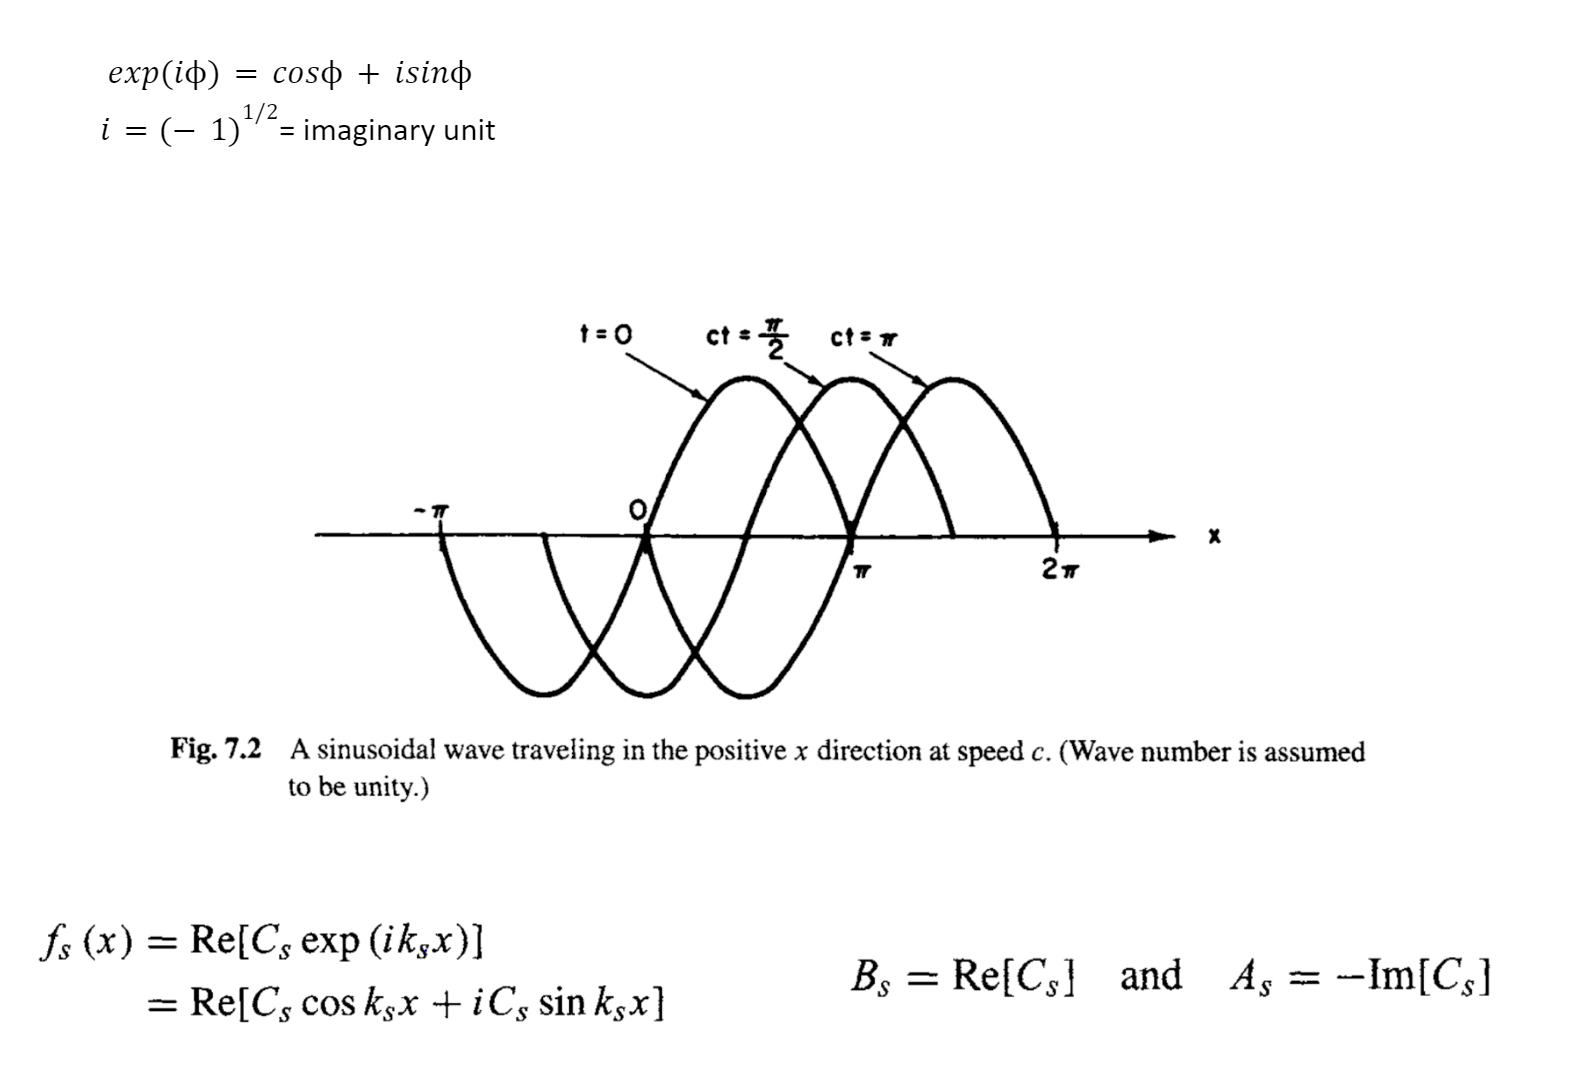
The frequency of oscillation (v) of a linear oscillator only depends on the physical characteristics of the oscillator, instead of the motion itself. This case is different for propagating waves, where (v) depends on the wave number of the perturbation, and the physical properties of the medium. c = v/k Phase speed depends on the wave number, except when

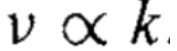
(That is a dispersion relationship.) For waves were phase speed changes with k, all the sinusoidal components of a disturbance from one specific location are dispersed. These are called dispersive waves. If the wave’s phase speeds are independent of the wave number, the wave is a nondispersive wave. Nondispersive waves have a spatially localized disturbance containing Fourier wave components and keep their original shape through propagation through space. Nondispersive waves propagate through space at the phase speed. Dispersive waves’ shapes do not remain constant through propagation. Individual wave components can move faster or slower than the average phase speed of the individual Fourier components. In atmospheric disturbances, the group velocity will exceed the phase velocity.

Group velocity: The velocity where the disturbance propagates

Total disturbance:
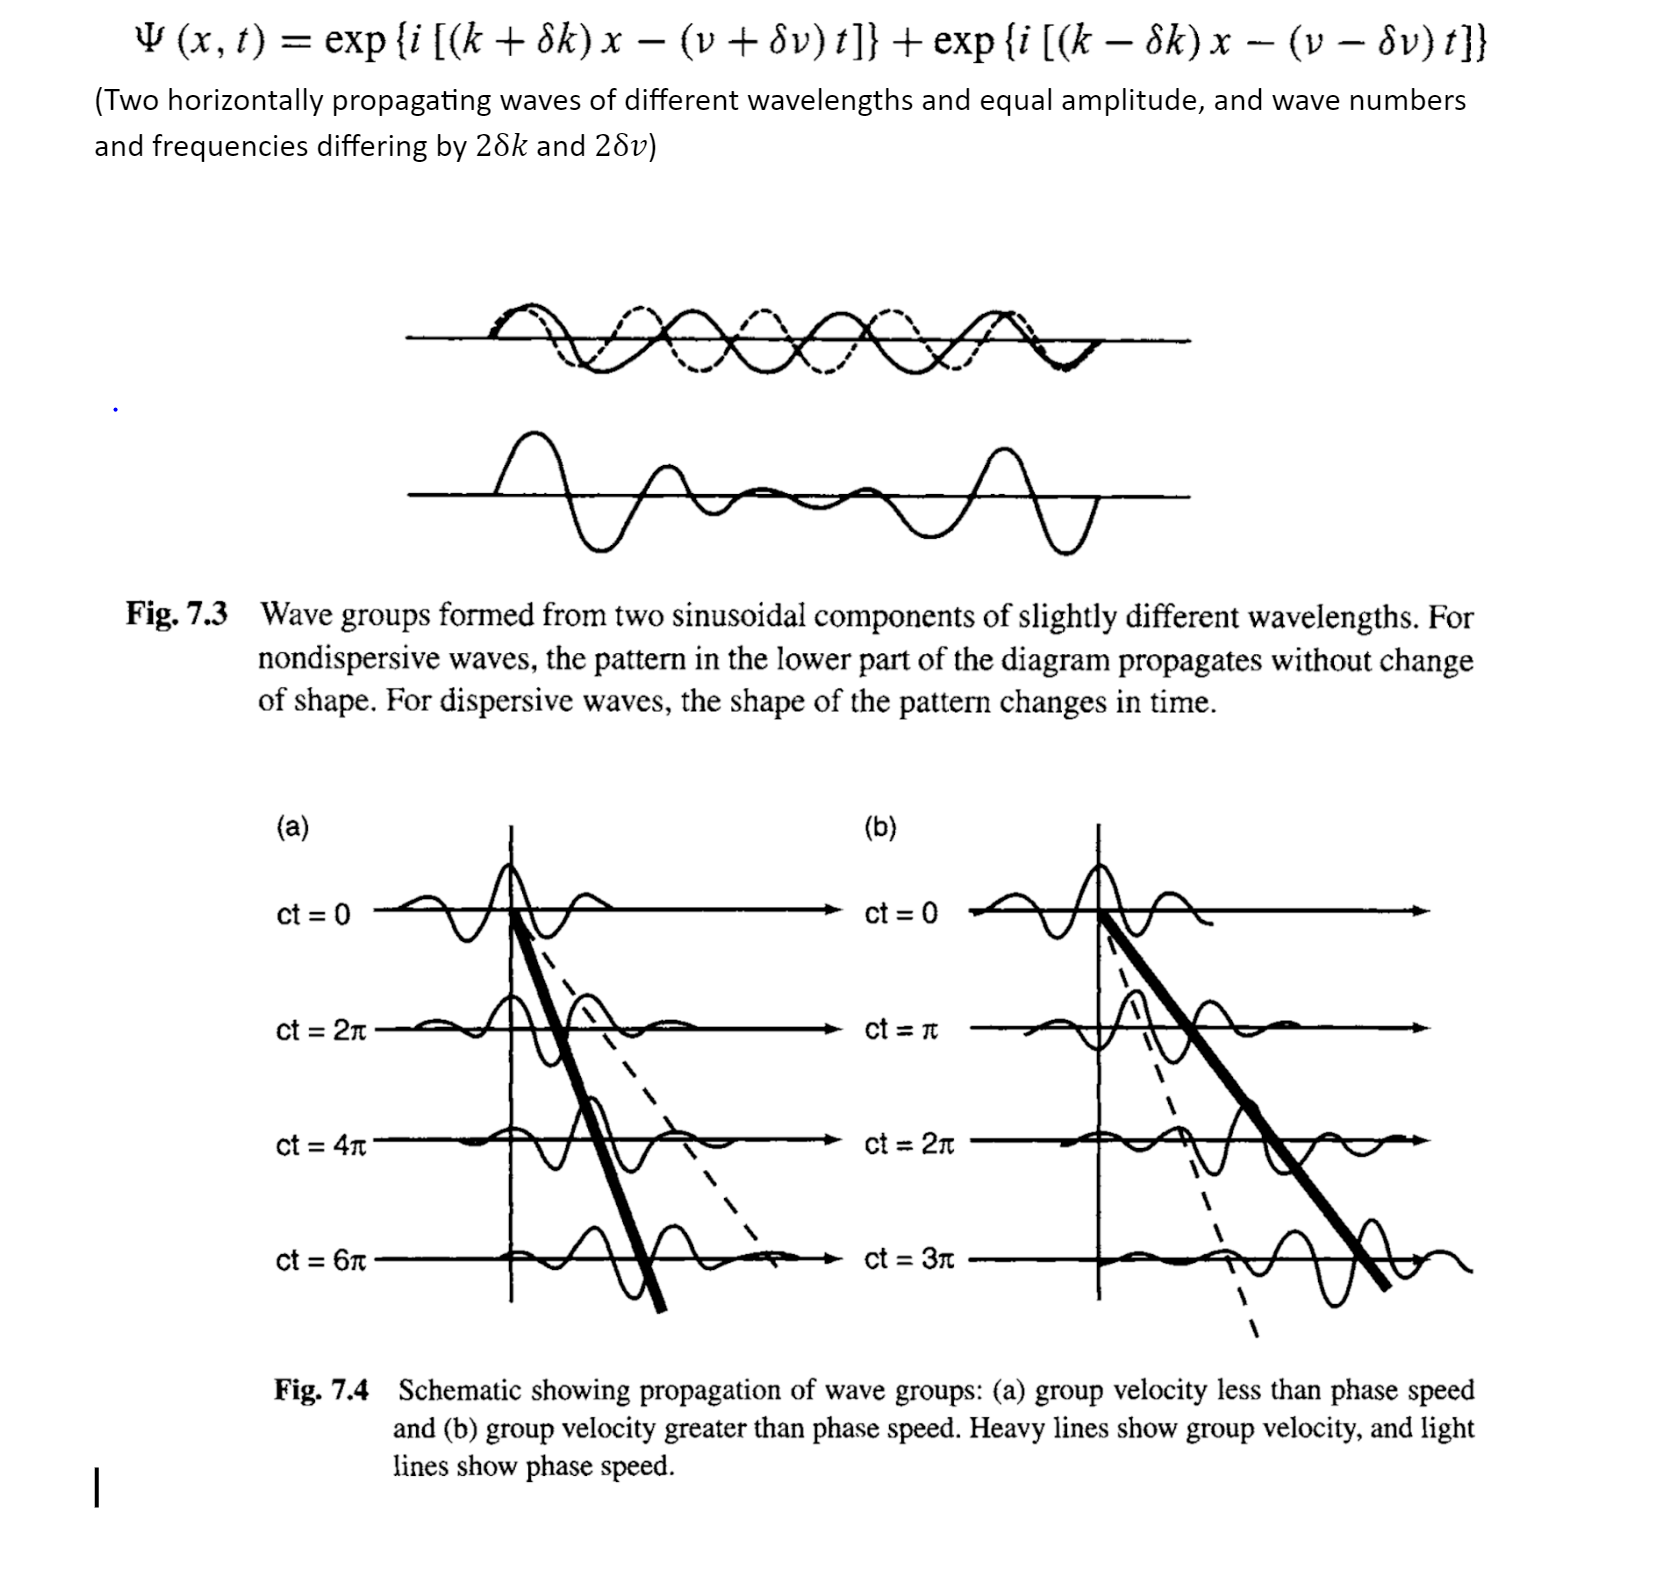
After applying the Euler formula:

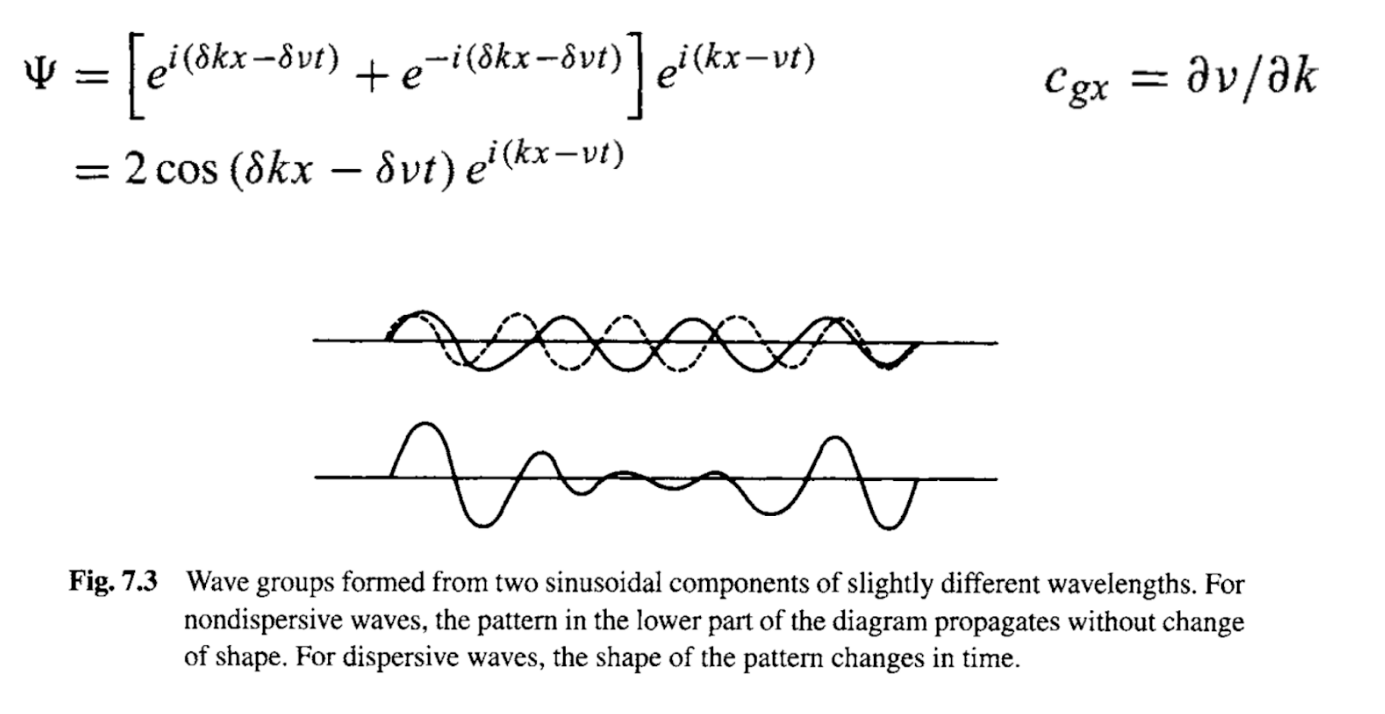
References “Chapter 7 Atmospheric Oscillations: Linear Perturbation Theory.” International Geophysics, Academic Press, 2 Sept. 2007, https://www.sciencedirect.com/science/article/pii/S007461420480041X.